#Codes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##install necessary libraries


In [2]:
!pip install tensorflow transformers datasets nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split


##Using Pandas to load the dataset and Check if there is any missing values

In [4]:
import pandas as pd

# Load the data
data_path = '/content/drive/MyDrive/Spam_SMS.csv'
df = pd.read_csv(data_path)

# Check for missing values and class distribution
print(df.isnull().sum())
print(df['Class'].value_counts())

Class      0
Message    0
dtype: int64
Class
ham     1881
spam    1547
Name: count, dtype: int64


##Text Preprocessing

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Lowercase and remove punctuation
df['Message'] = df['Message'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Tokenization
stop_words = set(stopwords.words('english'))
df['Message'] = df['Message'].apply(lambda x: [word for word in nltk.word_tokenize(x) if word not in stop_words])
df['Message'] = df['Message'].apply(lambda x: ' '.join(x))

# Train, Validation, and Test Split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Train set size: 2467
Validation set size: 275
Test set size: 686


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['Class'])
val_labels = label_encoder.transform(val_df['Class'])
test_labels = label_encoder.transform(test_df['Class'])

In [7]:
from tensorflow.keras.layers import TextVectorization

# Create the TextVectorization layer
max_features = 10000  # Number of unique words to consider
sequence_length = 128  # Length of each input sequence

vectorizer = TextVectorization(max_tokens=max_features, output_mode='int', output_sequence_length=sequence_length)
vectorizer.adapt(train_df['Message'])

# Transform the text data
train_texts = vectorizer(train_df['Message'])
val_texts = vectorizer(val_df['Message'])
test_texts = vectorizer(test_df['Message'])


In [8]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, input_length=sequence_length),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Change to 'softmax' if more than 2 classes
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'sparse_categorical_crossentropy' for multi-class


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
history = model.fit(train_texts, train_labels, validation_data=(val_texts, val_labels), epochs=20, batch_size=16)


Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.5598 - loss: 0.6847 - val_accuracy: 0.5818 - val_loss: 0.6724
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5665 - loss: 0.6812 - val_accuracy: 0.5818 - val_loss: 0.6674
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 0.6550 - val_accuracy: 0.9673 - val_loss: 0.5315
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8196 - loss: 0.4573 - val_accuracy: 0.8945 - val_loss: 0.2858
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9533 - loss: 0.2082 - val_accuracy: 0.9527 - val_loss: 0.1476
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9691 - loss: 0.1155 - val_accuracy: 0.9636 - val_loss: 0.1102
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9738 - loss: 0.0901 - val_accuracy: 0.9673 - val_loss: 0.0897
Epoch 8/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9845 - loss: 0.0521 - val_accuracy: 

In [10]:
test_loss, test_accuracy = model.evaluate(test_texts, test_labels)
print(f"Test Accuracy: {test_accuracy}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9753 - loss: 0.1019
Test Accuracy: 0.9781340956687927


In [11]:
predictions = model.predict(test_texts)
predictions = (predictions > 0.5).astype(int)

# Print predictions alongside original messages and true labels
test_df['Predicted'] = predictions  # Add predictions to the test DataFrame
test_df['True'] = test_labels  # Add true labels to the test DataFrame

# Display the original messages along with their predicted and true labels
print(test_df[['Message', 'True', 'Predicted']].tail(10))  # Print the first 10 rows


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
                                                Message  True  Predicted
1830                    freemsgfav xmas tonesreply real     1          0
790      great escape fancy bridge needs lager see tomo     0          0
3061  hack chat get backdoor entry 121 chat rooms fr...     1          1
1860                                  take exam march 3     0          0
1480  bored speed dating try speedchat txt speedchat...     1          1
818                          sorry battery died yeah im     0          0
1684  get free trial subscription premium service of...     1          1
2465  time n smile r two crucial things life sometim...     0          0
2155  new job alert earn 3940day home experience nee...     1          1
3217                               dont gim lip caveboy     0          0


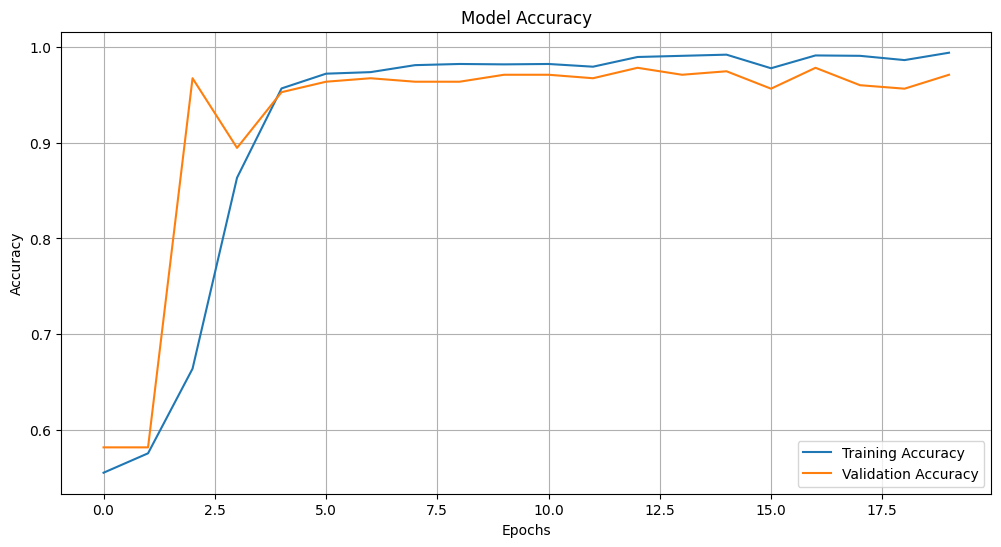

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import os
os.makedirs('/content/drive/MyDrive/saved_model/', exist_ok=True)


In [19]:
model.save('/content/drive/MyDrive/saved_model/spam_classifier.keras')
